In [13]:
import qutip as qp
import numpy as np
import matplotlib.pyplot as plt

In [14]:
nmax = 20;

gamma = 0.75;
nth = 2;

A = qp.destroy(nmax);

H = 2*np.pi*(A.dag()*A);

psi0 = qp.coherent_dm(nmax,4.0);
tlist = np.linspace(0,20,2001);

J_o = [np.sqrt(gamma*(1+nth))*A,np.sqrt(gamma*(nth))*A.dag()];

data = qp.mesolve(H,psi0,tlist,J_o,A.dag()*A);

n = data.expect[0];

G1 = qp.correlation_2op_1t(H,psi0,tlist,J_o,A.dag(),A);
G1 = G1/(np.sqrt(n[0]*n))

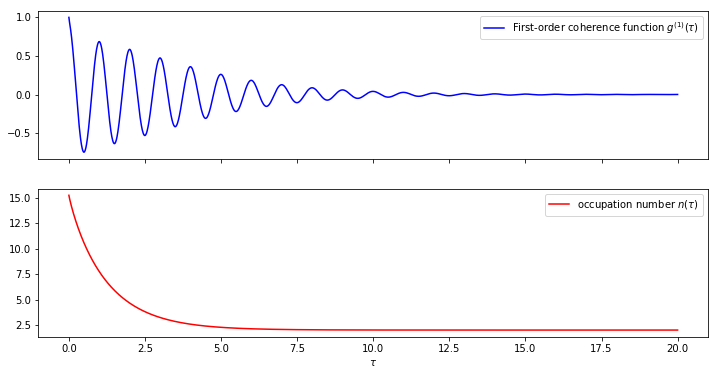

In [15]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,6))

axes[0].plot(tlist, np.real(G1), 'b', label=r'First-order coherence function $g^{(1)}(\tau)$')
axes[1].plot(tlist, np.real(n),  'r', label=r'occupation number $n(\tau)$')
axes[0].legend()
axes[1].legend()
axes[1].set_xlabel(r'$\tau$');

In [16]:
psi = qp.steadystate(H,J_o);
data = qp.mesolve(H,psi,tlist,J_o,A.dag()*A);
n = data.expect[0];
G2 = qp.correlation_3op_1t(H,psi,tlist,J_o,A.dag(),A.dag()*A,A);
G2 = G2/(n[0]*n)

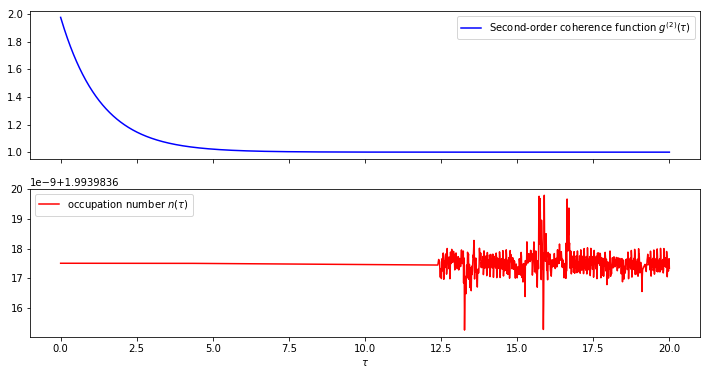

In [12]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12,6))

axes[0].plot(tlist, np.real(G2), 'b', label=r'Second-order coherence function $g^{(2)}(\tau)$')
axes[1].plot(tlist, np.real(n),  'r', label=r'occupation number $n(\tau)$')
axes[0].legend(loc=0)
axes[1].legend()
axes[1].set_xlabel(r'$\tau$');

In [68]:
output = qp.mesolve(H,psi0,tlist,J_o,[]);

In [72]:
output.states[-1]

Quantum object: dims = [[20], [20]], shape = (20, 20), type = oper, isherm = True
Qobj data =
[[3.33433265e-001+0.00000000e+000j 1.03971739e-004-3.97047598e-014j
  3.53114629e-008-9.11684421e-017j 3.25540682e-012-2.93627533e-020j
  1.52822850e-016-7.88899557e-025j 1.39146479e-021+1.47149664e-028j
  3.70562012e-027+2.36063350e-033j 1.40497265e-033+3.27750199e-039j
  9.34813600e-041+6.22251997e-046j 6.38590691e-049+1.02963997e-053j
  4.62206599e-058+1.59983037e-062j 2.36145718e-068+1.59485645e-072j
  7.84173776e-080+9.54312691e-084j 1.27126820e-092+2.60077519e-096j
  9.29121853e-107+2.99988319e-110j 2.77777312e-122+1.33339979e-125j
  3.72831211e-139+2.50938559e-142j 2.73239745e-157+2.42885510e-160j
  1.55683559e-176+1.71008372e-179j 1.05286336e-196+1.29416181e-199j]
 [1.03971739e-004+3.97047598e-014j 2.22288959e-001+0.00000000e+000j
  9.77410347e-005-3.73253216e-014j 4.04504670e-008-1.04436542e-016j
  4.26927536e-012-3.85075289e-020j 2.21354802e-016-1.14267413e-024j
  2.17341848e-021+2.2